<a href="https://colab.research.google.com/github/wanana12/signate/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ライブラリの読み込み

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## データの読み込み

In [3]:
!ls /content/drive/MyDrive/car

sample_submit.csv  test.tsv  train.tsv


In [4]:
train = pd.read_csv("/content/drive/MyDrive/car/train.tsv", sep='\t')
test = pd.read_csv("/content/drive/MyDrive/car/test.tsv", sep='\t')
sample_submit = pd.read_csv("/content/drive/MyDrive/car/sample_submit.csv", header=None)

In [5]:
sample_submit.head()

,0,1
0,1,good
1,2,vgood
2,4,acc
3,5,acc
4,6,unacc


In [6]:
train.head()

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high


In [7]:
test.head()

,id,buying,maint,doors,persons,lug_boot,safety
0,1,high,vhigh,2,more,big,low
1,2,vhigh,vhigh,5more,4,small,high
2,4,med,high,2,2,small,low
3,5,med,med,4,4,big,med
4,6,high,high,2,4,med,low


## pandasプロット

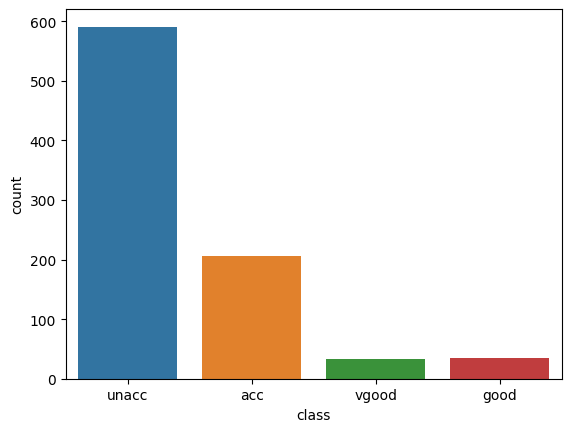

In [8]:
sns.countplot(x="class", data=train)
plt.show()

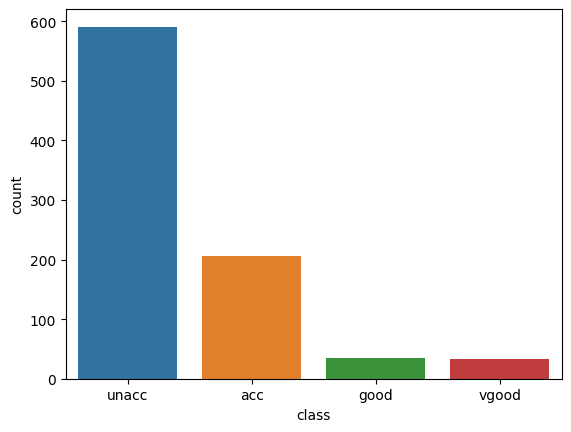

In [9]:
sns.countplot(x="class", data=train, order=["unacc", "acc", "good", "vgood"])
plt.show()

## データ前処理

In [10]:
data = pd.concat([train, test], sort=False)

In [11]:
data.head()

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high


In [12]:
print(len(train), len(test), len(data))

864 864 1728


In [13]:
data.isnull().sum()

id            0
class       864
buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 863
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1728 non-null   int64 
 1   class     864 non-null    object
 2   buying    1728 non-null   object
 3   maint     1728 non-null   object
 4   doors     1728 non-null   object
 5   persons   1728 non-null   object
 6   lug_boot  1728 non-null   object
 7   safety    1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 121.5+ KB


### buying、maint

In [15]:
data['buying'].replace(['vhigh', 'high', 'med', 'low'], [0, 1, 2, 3], inplace=True)
data['maint'].replace(['vhigh', 'high', 'med', 'low'], [0, 1, 2, 3], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 863
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1728 non-null   int64 
 1   class     864 non-null    object
 2   buying    1728 non-null   int64 
 3   maint     1728 non-null   int64 
 4   doors     1728 non-null   object
 5   persons   1728 non-null   object
 6   lug_boot  1728 non-null   object
 7   safety    1728 non-null   object
dtypes: int64(3), object(5)
memory usage: 121.5+ KB


### doors

In [16]:
data['doors'].unique()

array(['3', '5more', '2', '4'], dtype=object)

In [17]:
data['doors'].replace(['2', '3', '4', '5more'], [2, 3, 4, 5], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 863
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1728 non-null   int64 
 1   class     864 non-null    object
 2   buying    1728 non-null   int64 
 3   maint     1728 non-null   int64 
 4   doors     1728 non-null   int64 
 5   persons   1728 non-null   object
 6   lug_boot  1728 non-null   object
 7   safety    1728 non-null   object
dtypes: int64(4), object(4)
memory usage: 121.5+ KB


### persons

In [18]:
data['persons'].unique()

array(['2', 'more', '4'], dtype=object)

In [19]:
data['persons'].replace(['2', '4', 'more'], [2, 4, 6], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 863
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1728 non-null   int64 
 1   class     864 non-null    object
 2   buying    1728 non-null   int64 
 3   maint     1728 non-null   int64 
 4   doors     1728 non-null   int64 
 5   persons   1728 non-null   int64 
 6   lug_boot  1728 non-null   object
 7   safety    1728 non-null   object
dtypes: int64(5), object(3)
memory usage: 121.5+ KB


### lug_boot、safety

In [20]:
data['lug_boot'].replace(['small', 'med', 'big'], [0, 1, 2], inplace=True)
data['safety'].replace(['low', 'med', 'high'], [0, 1, 2], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 863
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1728 non-null   int64 
 1   class     864 non-null    object
 2   buying    1728 non-null   int64 
 3   maint     1728 non-null   int64 
 4   doors     1728 non-null   int64 
 5   persons   1728 non-null   int64 
 6   lug_boot  1728 non-null   int64 
 7   safety    1728 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 121.5+ KB


In [21]:
delete_columns = ['id']
data.drop(delete_columns, axis=1, inplace=True)
data.head()

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,3,2,3,2,0,0
1,acc,3,1,3,6,0,1
2,unacc,0,1,5,2,0,1
3,acc,1,1,3,6,2,1
4,unacc,1,1,3,2,1,2


In [22]:
train = data[:len(train)]
test = data[len(train):]

In [23]:
y_train = train['class']
X_train = train.drop('class', axis = 1)
X_test = test.drop('class', axis = 1)

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,2,3,2,0,0
1,3,1,3,6,0,1
2,0,1,5,2,0,1
3,1,1,3,6,2,1
4,1,1,3,2,1,2


In [25]:
y_train.head()

0    unacc
1      acc
2    unacc
3      acc
4    unacc
Name: class, dtype: object

In [26]:
y_train.replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3], inplace=True)
y_train.head()

<ipython-input-26-8d5751d1beec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3], inplace=True)


0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64

## 機械学習

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier()

In [29]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = clf.predict(X_test)

In [31]:
y_pred[:20]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [32]:
clf.score(X_train, y_train)

1.0

In [33]:
df_y_pred = pd.DataFrame({'y_pred': y_pred})
df_y_pred['y_pred'].replace([0, 1, 2, 3], ['unacc', 'acc', 'good', 'vgood'], inplace=True)
df_y_pred['y_pred'][:20]

0     unacc
1     unacc
2     unacc
3       acc
4     unacc
5     unacc
6     unacc
7       acc
8       acc
9     unacc
10      acc
11    unacc
12    unacc
13      acc
14    unacc
15    unacc
16    unacc
17    unacc
18    unacc
19    unacc
Name: y_pred, dtype: object

## データの出力

In [34]:
sub = sample_submit
sub[1] = df_y_pred['y_pred']
sub.to_csv("/content/drive/MyDrive/car/submit.csv", index=False, header=False)

In [35]:
sub.head()

,0,1
0,1,unacc
1,2,unacc
2,4,unacc
3,5,acc
4,6,unacc
